In [ ]:
#금융 데이터를 가져오고 분석하는 데 사용되는 도구 설치하기
!pip install finance_datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
#FinanceDataReader 패키지를 사용하여 NASDAQ(미국의 한 증권 거래소)에 상장된 주식에 대한 정보를 가져오기
df=fdr.StockListing('NASDAQ')
df.head(20)

100%|██████████| 3943/3943 [00:30<00:00, 128.00it/s]


,Symbol,Name,IndustryCode,Industry
0,AAPL,Apple Inc,57106020,전화 및 소형 장치
1,MSFT,Microsoft Corp,57201020,소프트웨어
2,AMZN,Amazon.com Inc,53402010,백화점
3,NVDA,NVIDIA Corp,57101010,반도체
4,GOOGL,Alphabet Inc Class A,57201030,온라인 서비스
5,META,Meta Platforms Inc,57201030,온라인 서비스
6,GOOG,Alphabet Inc Class C,57201030,온라인 서비스
7,TSLA,Tesla Inc,53101010,자동차 및 트럭 제조
8,AVGO,Broadcom Inc,57101010,반도체
9,ADBE,Adobe Inc,57201020,소프트웨어


In [ ]:
# 'NVIDIA Corp'인 행을 선택
df[df.Name=='NVIDIA Corp']

,Symbol,Name,IndustryCode,Industry
3,NVDA,NVIDIA Corp,57101010,반도체


In [ ]:
#'NVDA' 주식에 대한 가격 데이터를 2020년부터 2023년까지 가져오기
df=fdr.DataReader('NVDA','2020','2023')

In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-23,151.960007,153.389999,148.830002,152.005920,34932600
2022-12-27,150.740005,151.000000,140.559998,141.159790,46490200
2022-12-28,139.270004,142.619995,138.839996,140.310074,35106600
2022-12-29,144.020004,146.830002,142.270004,145.978073,35492300
2022-12-30,143.339996,146.289993,142.330002,146.088028,31049000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    756 non-null    float64
 1   High    756 non-null    float64
 2   Low     756 non-null    float64
 3   Close   756 non-null    float64
 4   Volume  756 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.4 KB


In [ ]:
#월별 데이터의 평균으로 다운 샘플링하여 저장하기
df_month=df.resample("BM").mean()
df_month.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970347,2.916863e+07
2020-02-28,67.050000,68.891448,66.039737,67.479541,6.236133e+07
2020-03-31,60.518183,63.079205,58.258636,60.692793,7.169978e+07
2020-04-30,69.391666,70.897620,67.797381,69.026948,5.370621e+07
2020-05-29,81.483000,83.311125,79.973375,81.575506,6.274438e+07


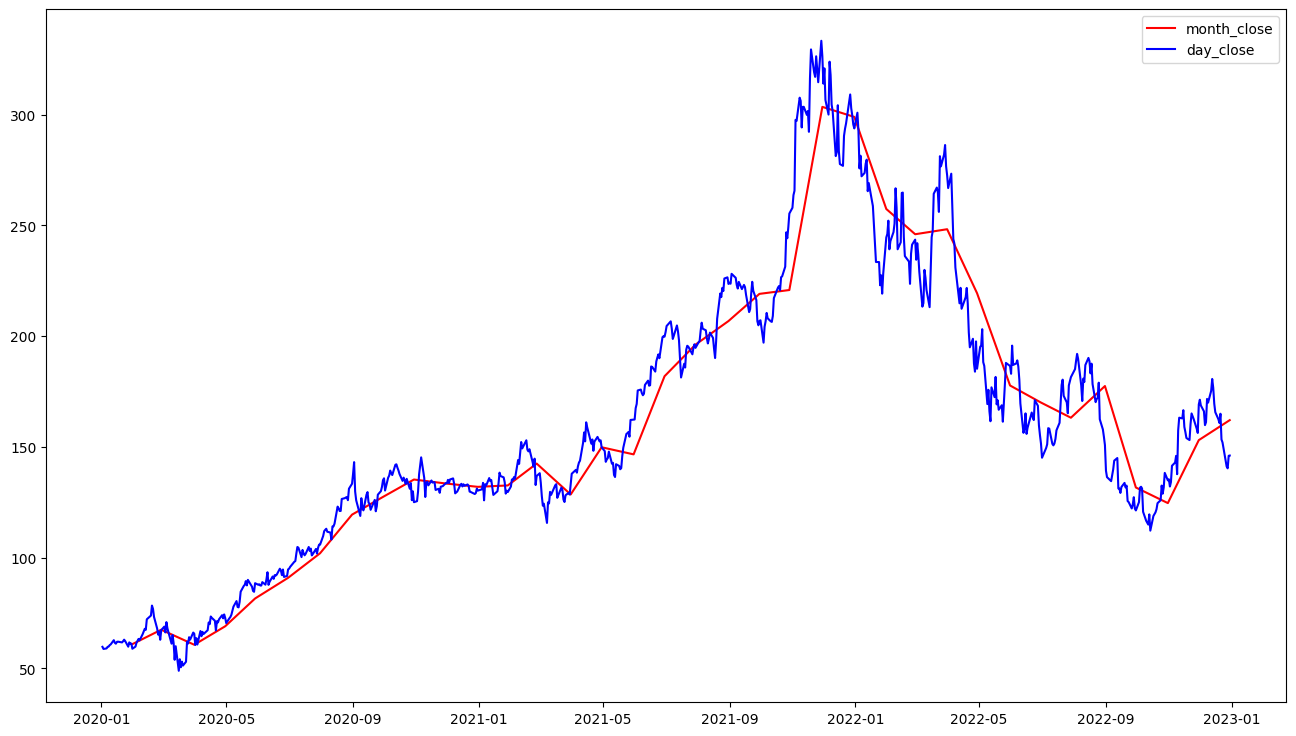

In [ ]:
#월별 평균을 시각화로 확인하기
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(df_month['Close'],color='red',label='month_close')
plt.plot(df['Close'],color='blue',label='day_close')
plt.legend()

In [ ]:
#월별 수익률 구하기 : pct_change()사용
df_month['rtn']=df_month['Close'].pct_change()
df_month

,Open,High,Low,Close,Volume,rtn
Date,,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970347,2.916863e+07,NaN
2020-02-28,67.050000,68.891448,66.039737,67.479541,6.236133e+07,0.106760
2020-03-31,60.518183,63.079205,58.258636,60.692793,7.169978e+07,-0.100575
2020-04-30,69.391666,70.897620,67.797381,69.026948,5.370621e+07,0.137317
2020-05-29,81.483000,83.311125,79.973375,81.575506,6.274438e+07,0.181792
2020-06-30,91.100909,92.442727,89.457386,90.900985,4.417938e+07,0.114317
2020-07-31,102.068409,103.709318,100.466932,101.983693,3.679296e+07,0.121921
2020-08-31,118.995714,121.199642,117.377024,119.420911,4.605973e+07,0.170980
2020-09-30,128.181072,131.072977,124.355953,127.415858,7.550739e+07,0.066948


In [ ]:
#주가 흐름 파악학기: rolling()

이동평균선은 과거 주식 가격 흐름을 바탕으로 앞으로의 주식 가격을 예측하는데 사용하는 선이다. 일정 기간 동안의 주식 가격 흐름을 평균을 내서 그 선을 연결하는 것으로 생각하면 이해하기 쉽다. 만약 5일 이동평균선이라고 하면 최근 5일간의 주가를 종가 기준으로 합하여 5로 나눠 평균을 구하는 것이다. 판다스에서 제공하는 rolling()을 사용하면 이러한 이동평균선을 쉽게 구할 수 있다. 여기서 df_month 데이터프레임은 한 달 단위로 집약시킨 데이터이다. rolling(2).mean()을 사용해서 2달씩 종가의 평균을 구할 수 있다.

In [ ]:
df_month['MA']=df_month['Close'].rolling(2).mean()
df_month.head()

,Open,High,Low,Close,Volume,rtn,MA
Date,,,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970347,2.916863e+07,NaN,NaN
2020-02-28,67.050000,68.891448,66.039737,67.479541,6.236133e+07,0.106760,64.224944
2020-03-31,60.518183,63.079205,58.258636,60.692793,7.169978e+07,-0.100575,64.086167
2020-04-30,69.391666,70.897620,67.797381,69.026948,5.370621e+07,0.137317,64.859871
2020-05-29,81.483000,83.311125,79.973375,81.575506,6.274438e+07,0.181792,75.301227


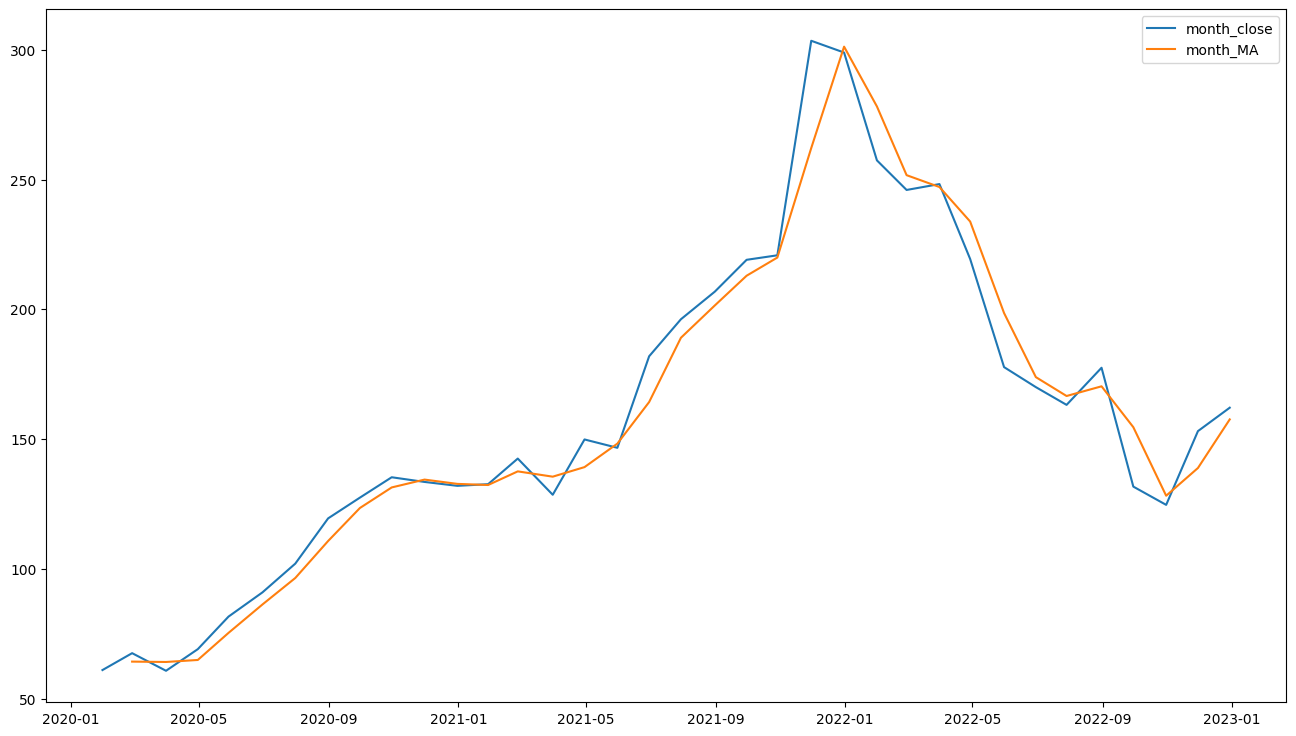

In [ ]:
#df_month의 종가와 이동평균선(MA)을 시각화하기
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(df_month['Close'],label='month_close')
plt.plot(df_month['MA'],label='month_MA')
plt.legend()

In [ ]:
#3개월 이동평균선을 구해 'MA1'컬럼에 추가하고 Close,MA,MA1을 그래프로 시각화해보자
df_month['MA1']=df_month['Close'].rolling(3).mean()
df_month.head()

,Open,High,Low,Close,Volume,rtn,MA,MA1
Date,,,,,,,,
2020-01-31,61.182024,61.811548,60.434167,60.970347,2.916863e+07,NaN,NaN,NaN
2020-02-28,67.050000,68.891448,66.039737,67.479541,6.236133e+07,0.106760,64.224944,NaN
2020-03-31,60.518183,63.079205,58.258636,60.692793,7.169978e+07,-0.100575,64.086167,63.047561
2020-04-30,69.391666,70.897620,67.797381,69.026948,5.370621e+07,0.137317,64.859871,65.733094
2020-05-29,81.483000,83.311125,79.973375,81.575506,6.274438e+07,0.181792,75.301227,70.431749


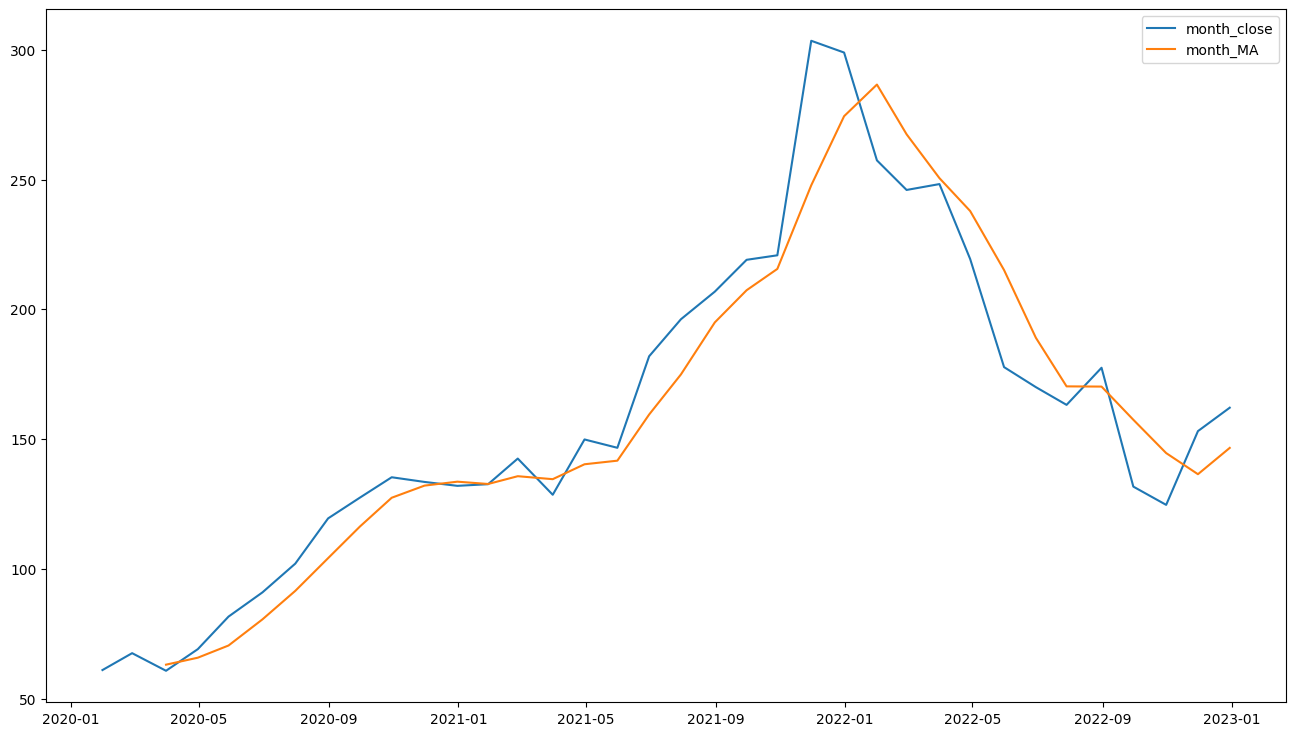

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(df_month['Close'],label='month_close')
plt.plot(df_month['MA1'],label='month_MA')
plt.legend()

In [ ]:
#최근 종가를 가져와 이동평균선과 비교를 통해 상승장인지 하락장인지 판단해 보자.
last_close=df_month['MA'].iloc[-1] #최근 두달
print(last_close)
price= df['Close'].iloc[-1]#오늘 종가
print(price)
if price>last_close:
  print('상승 장')
elif price<last_close:
  print('하락 장')
else:
  print('변화 없음')

157.55539633333336
146.088028
하락 장


# 국내 주식 정보 fdr.StockListing('KRX')

In [ ]:
df_kr=fdr.StockListing('KRX')
df_kr.head(20)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72200,2,-600,-0.82,72400,72500,71700,4023309,289947075700,431018300110000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,431000,2,-23500,-5.17,444000,448000,429000,215318,93210425000,100854000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,131600,2,-2300,-1.72,132200,133000,131200,1337913,176504780500,95805111234000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,722000,2,-3000,-0.41,725000,726000,718000,6608,4765940000,51387628000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,57800,2,-100,-0.17,58000,58000,57600,249459,14418501600,47562851260000,822886700,STK
5,005490,KR7005490008,POSCO홀딩스,KOSPI,,474500,2,-8500,-1.76,483000,483000,469500,206269,97897848500,40129048635000,84571230,STK
6,005380,KR7005380001,현대차,KOSPI,,182600,2,-1700,-0.92,183300,183400,181700,112278,20479893000,38625652995600,211531506,STK
7,051910,KR7051910008,LG화학,KOSPI,,491500,2,-9500,-1.90,499500,501000,487000,93418,45940514000,34696136584500,70592343,STK
8,000270,KR7000270009,기아,KOSPI,,85000,2,-900,-1.05,84800,85300,84400,245383,20773176900,34173757255000,402044203,STK
9,035420,KR7035420009,NAVER,KOSPI,,207000,2,-1000,-0.48,208000,210000,204000,264390,54665355000,33618578958000,162408594,STK


In [ ]:
#자신이 관심있는 종목을 분석하기(현재 하락장인지 아닌지 등등)

KB금융

In [ ]:
df_kr[df_kr.Name=='KB금융']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
17,105560,KR7105560007,KB금융,KOSPI,,52400,3,0,0.0,52600,52800,52000,168370,8830006700,21143980172800,403511072,STK


In [ ]:
#'KB금융' 주식에 대한 가격 데이터를 2015년부터 2023년까지 가져오기
df_kr=fdr.DataReader('105560','2015','2023')

In [ ]:
df_kr.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-12-23,52100,52300,51600,51600,737229,-0.019011
2022-12-26,51500,51900,50700,51000,861603,-0.011628
2022-12-27,51300,51800,50700,51500,1405920,0.009804
2022-12-28,50000,50000,48900,49450,1098303,-0.039806
2022-12-29,48950,49400,48500,48500,707932,-0.019211


In [ ]:
df_kr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1969 entries, 2015-01-02 to 2022-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1969 non-null   int64  
 1   High    1969 non-null   int64  
 2   Low     1969 non-null   int64  
 3   Close   1969 non-null   int64  
 4   Volume  1969 non-null   int64  
 5   Change  1969 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 107.7 KB


In [ ]:
#월별 데이터의 평균으로 다운 샘플링하여 저장하기
df_kr_month=df_kr.resample("BM").mean()
df_kr_month.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-30,36540.476190,37023.809524,36104.761905,36564.285714,8.736981e+05,0.001004
2015-02-27,37850.000000,38200.000000,37352.941176,37844.117647,8.539881e+05,0.003585
2015-03-31,38334.090909,38727.272727,37825.000000,38247.727273,1.034691e+06,0.000513
2015-04-30,39565.909091,40159.090909,39068.181818,39588.636364,1.070756e+06,0.002069
2015-05-29,40683.333333,41216.666667,40202.777778,40727.777778,9.405408e+05,-0.000829


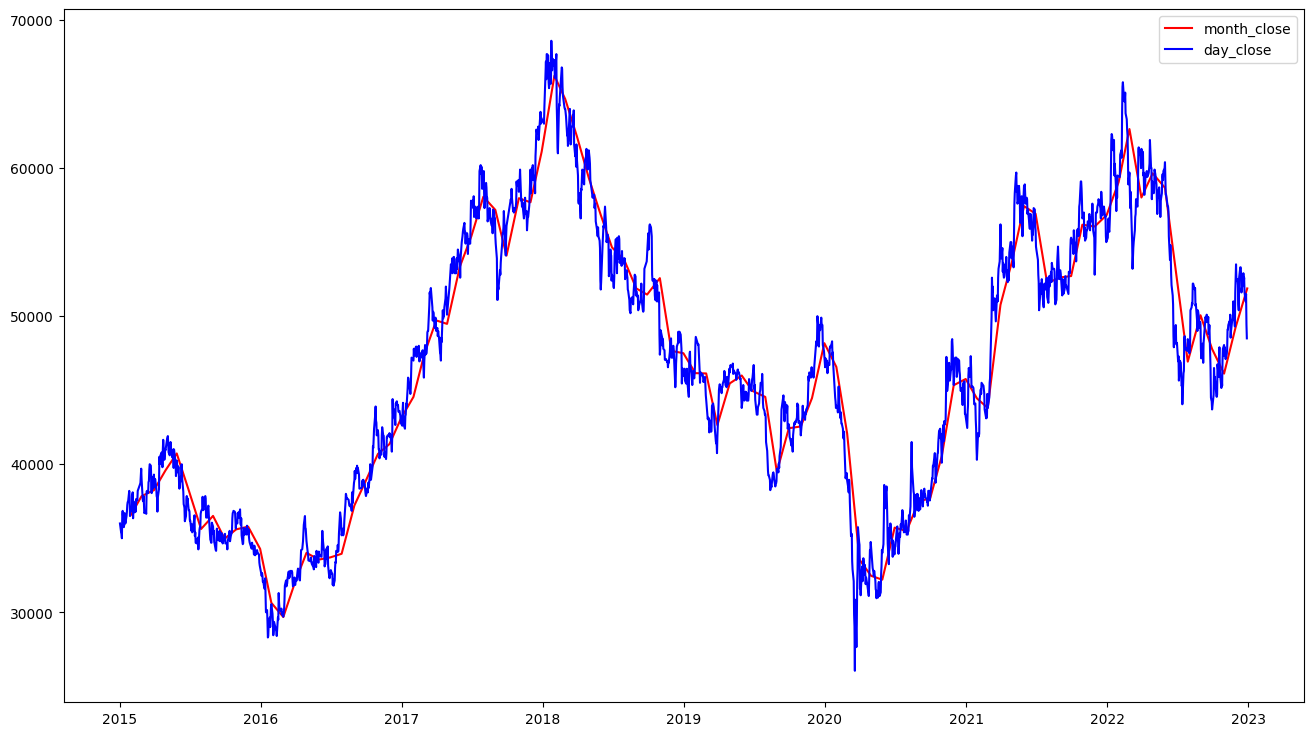

In [ ]:
#월별 평균을 시각화로 확인하기
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(df_kr_month['Close'],color='red',label='month_close')
plt.plot(df_kr['Close'],color='blue',label='day_close')
plt.legend()

In [ ]:
#월별 수익률 구하기 : pct_change()사용
df_kr_month['rtn']=df_kr_month['Close'].pct_change()
df_kr_month

,Open,High,Low,Close,Volume,Change,rtn
Date,,,,,,,
2015-01-30,36540.476190,37023.809524,36104.761905,36564.285714,8.736981e+05,0.001004,NaN
2015-02-27,37850.000000,38200.000000,37352.941176,37844.117647,8.539881e+05,0.003585,0.035002
2015-03-31,38334.090909,38727.272727,37825.000000,38247.727273,1.034691e+06,0.000513,0.010665
2015-04-30,39565.909091,40159.090909,39068.181818,39588.636364,1.070756e+06,0.002069,0.035059
2015-05-29,40683.333333,41216.666667,40202.777778,40727.777778,9.405408e+05,-0.000829,0.028774
...,...,...,...,...,...,...,...
2022-08-31,50059.090909,50554.545455,49504.545455,50061.363636,9.920955e+05,0.001060,0.066757
2022-09-30,48035.000000,48562.500000,47265.000000,47785.000000,1.313534e+06,-0.005901,-0.045471
2022-10-31,45955.263158,46657.894737,45447.368421,46118.421053,1.284685e+06,0.005254,-0.034877


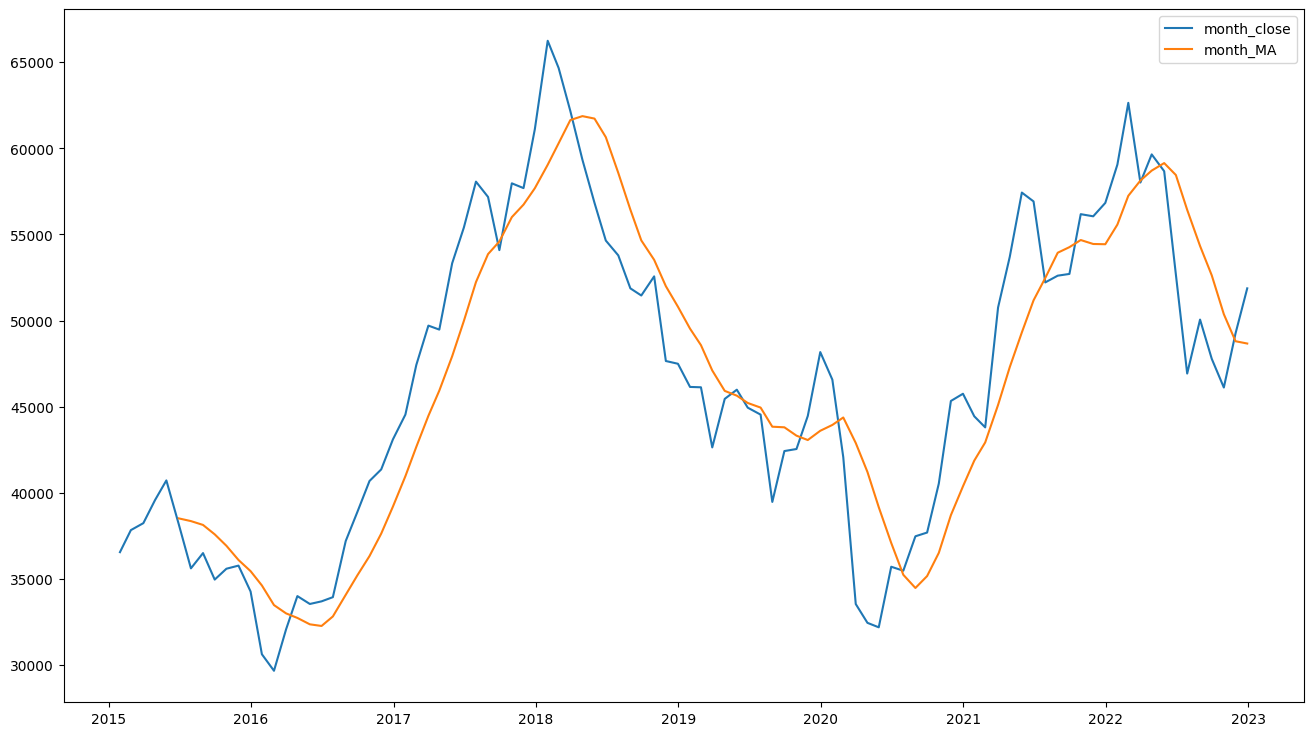

In [ ]:
#rolling(6).mean()을 사용해서 6달씩 종가의 평균을 구하기
df_kr_month['MA']=df_kr_month['Close'].rolling(6).mean()
#df_kr_month의 종가와 이동평균선(MA)을 시각화하기
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(df_kr_month['Close'],label='month_close')
plt.plot(df_kr_month['MA'],label='month_MA')
plt.legend()

In [ ]:
#최근 종가를 가져와 이동평균선과 비교를 통해 상승장인지 하락장인지 판단해 보자.
kb_last_close=df_kr_month['MA'].iloc[-1] #최근 6달
print(kb_last_close)
kb_price= df_kr['Close'].iloc[-1]#오늘 종가
print(kb_price)
if kb_price>kb_last_close:
  print('상승 장')
elif kb_price<kb_last_close:
  print('하락 장')
else:
  print('변화 없음')

48671.42154628997
48500
하락 장
